In [2]:
from scipy.special import gamma, factorial
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special

def F_1j_nu_0(nu_0,x):
    sMax=100
    Error=1e-20

    amplitude=np.sqrt(2*nu_0*np.tanh(nu_0*np.pi*0.5)/np.pi)
    multiplication=1
    F_1j_nu_0=0
    for s in np.arange(0,sMax+1):
        multiplication=multiplication*(s**2+nu_0**2)
        phi_nu_0_s=np.angle(gamma(1+s+1j*nu_0))
        Sum=(-1)**s*np.cos(nu_0*np.log(x/2)-phi_nu_0_s)*(x**2/4)**(s)/np.math.factorial(s)/np.sqrt(multiplication)
        F_1j_nu_0=F_1j_nu_0+Sum
        if(np.size(Sum)==1):
            Sum=np.append(Sum,0)
        if(max(abs(Sum))<Error):
            break
    if(s==sMax):
        print("F_1j_nu_0 don't converge")
    F_1j_nu_0=amplitude*F_1j_nu_0
    return(F_1j_nu_0)

def G_1j_nu_0(nu_0,x):
    sMax=100
    Error=1e-20

    amplitude=np.sqrt(2*nu_0/np.tanh(nu_0*np.pi*0.5)/np.pi)
    multiplication=1
    G_1j_nu_0=0
    for s in np.arange(0,sMax+1):
        multiplication=multiplication*(s**2+nu_0**2)
        phi_nu_0_s=np.angle(gamma(1+s+1j*nu_0))
        Sum=(-1)**s*np.sin(nu_0*np.log(x/2)-phi_nu_0_s)*(x**2/4)**(s)/np.math.factorial(s)/np.sqrt(multiplication)
        G_1j_nu_0=G_1j_nu_0+Sum
        if(np.size(Sum)==1):
            Sum=np.append(Sum,0)
        if(max(abs(Sum))<Error):
            break
    if(s==sMax):
        print("G_1j_nu_0 don't converge")
    G_1j_nu_0=amplitude*G_1j_nu_0
    return(G_1j_nu_0)

def DF_1j_nu_0(nu_0,x):
    sMax=100
    Error=1e-20

    amplitude=np.sqrt(2*nu_0*np.tanh(nu_0*np.pi*0.5)/np.pi)
    multiplication=1
    DF_1j_nu_0=0
    for s in np.arange(0,sMax+1):
        multiplication=multiplication*(s**2+nu_0**2)
        phi_nu_0_s=np.angle(gamma(1+s+1j*nu_0))
        derivative=-nu_0/2*np.sin(nu_0*np.log(x/2)-phi_nu_0_s)+s*np.cos(nu_0*np.log(x/2)-phi_nu_0_s)
        Sum=(-1)**s*(x**2/4)**(s)/np.math.factorial(s)/np.sqrt(multiplication)*2/x*derivative
        DF_1j_nu_0=DF_1j_nu_0+Sum
        if(np.size(Sum)==1):
            Sum=np.append(Sum,0)
        if(max(abs(Sum))<Error):
            break
    if(s==sMax):
        print("DF_1j_nu_0 don't converge")
    DF_1j_nu_0=amplitude*DF_1j_nu_0  
    return(DF_1j_nu_0)

def DG_1j_nu_0(nu_0,x):
    sMax=100
    Error=1e-20

    amplitude=np.sqrt(2*nu_0/np.tanh(nu_0*np.pi*0.5)/np.pi)
    multiplication=1
    DG_1j_nu_0=0
    for s in np.arange(0,sMax+1):
        multiplication=multiplication*(s**2+nu_0**2)
        phi_nu_0_s=np.angle(gamma(1+s+1j*nu_0))
        derivative=nu_0/2*np.cos(nu_0*np.log(x/2)-phi_nu_0_s)+s*np.sin(nu_0*np.log(x/2)-phi_nu_0_s)
        Sum=(-1)**s*(x**2/4)**(s)/np.math.factorial(s)/np.sqrt(multiplication)*2/x*derivative
        DG_1j_nu_0=DG_1j_nu_0+Sum
        if(np.size(Sum)==1):
            Sum=np.append(Sum,0)
        if(max(abs(Sum))<Error):
            break
    if(s==sMax):
        print("DG_1j_nu_0 don't converge")
    DG_1j_nu_0=amplitude*DG_1j_nu_0
    return(DG_1j_nu_0)

In [24]:
nu_0=0.5#m=0,alpha=pi/4
k_0=1
rho_0=np.exp(-60)
zeta_0=np.sqrt(k_0**2+nu_0**2/rho_0**2)
J_0=special.jn(0,zeta_0*rho_0)
J_1=special.jn(1,zeta_0*rho_0)
F=F_1j_nu_0(nu_0,k_0*rho_0)
G=G_1j_nu_0(nu_0,k_0*rho_0)
DF=DF_1j_nu_0(nu_0,k_0*rho_0)
DG=DG_1j_nu_0(nu_0,k_0*rho_0)

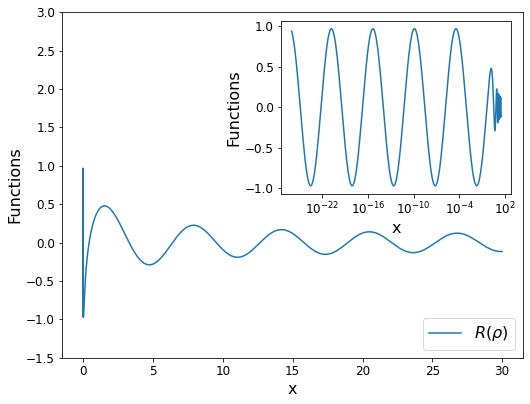

In [32]:
A=(k_0*J_0*DG+zeta_0*G*J_1)/(k_0*F*DG-k_0*G*DF)
B=(zeta_0*F*J_1+k_0*J_0*DF)/(-k_0*F*DG+k_0*G*DF)

rho1=np.exp(np.arange(np.log(rho_0),0,0.01))
rho2=np.arange(1,30,0.01)
rho=np.append(rho1,rho2)
R=A*F_1j_nu_0(nu_0,k_0*rho)+B*G_1j_nu_0(nu_0,k_0*rho)

fig = plt.figure()
fig.set_size_inches(8, 6)

left, bottom, width, height = 0.15,0.15,0.8,0.8
ax1 = fig.add_axes([left,bottom,width,height])
ax1.plot(rho,R,label=r'$R(\rho)$')
ax1.legend(prop={"size":16},loc='lower right')
ax1.set_xlabel('x',fontsize=16)
ax1.set_ylabel('Functions',fontsize=16)
ax1.set_ylim([-1.5,3])
ax1.tick_params(labelsize=12)

left, bottom, width, height = 0.53,0.53,0.4,0.4
ax2 = fig.add_axes([left,bottom,width,height])
ax2.plot(rho,R)
ax2.set_xlabel('x',fontsize=16)
ax2.set_ylabel('Functions',fontsize=16)
ax2.tick_params(labelsize=12)
plt.xscale('log')
plt.savefig('R3_k_'+str(k_0)+'.pdf')

In [13]:
figure = plt.gcf()

figure.set_size_inches(8, 6)
plt.savefig("sample.png", dpi=100)

<Figure size 576x432 with 0 Axes>

In [27]:
print('Hello'+str(1))

Hello1
